In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [143]:
%reload_kedro

[12/04/23 23:28:35] INFO     Resolved project path as: /Users/wojtek/Code/personal/creditmodel.     ]8;id=877167;file:///Users/wojtek/Code/personal/env/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=713255;file:///Users/wojtek/Code/personal/env/lib/python3.9/site-packages/kedro/ipython/__init__.py#139\139]8;;\
                             To set a different path, run '%reload_kedro <project_root>'                           

[12/04/23 23:28:35] WARNING  /Users/wojtek/Code/personal/env/lib/python3.9/site-packages/lazy_loade ]8;id=248190;file:///Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=185010;file:///Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/warnings.py#109\109]8;;\
                             r/__init__.py:78: KedroDeprecationWarning: 'CSVDataSet' has been                      
                             renamed to 'CSVDataset', and the alias will be removed in                             
                             Kedro-Datasets 2.0.0                                                                  
                               attr = getattr(submod, name)                                                        
                                                                                                                   

                    INFO     Kedro project creditModel                                              ]8;id=914107;file:///Users/wojtek/Code/personal/env/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=566155;file:///Users/wojtek/Code/personal/env/lib/python3.9/site-packages/kedro/ipython/__init__.py#108\108]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=538505;file:///Users/wojtek/Code/personal/env/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=766623;file:///Users/wojtek/Code/personal/env/lib/python3.9/site-packages/kedro/ipython/__init__.py#109\109]8;;\
                             'pipelines'                                                                           

Wczytanie  i wstępna analiza danych

In [144]:
train = catalog.load('train')
test = catalog.load('test')
sampleSubmission = catalog.load('sampleSubmission')


[12/04/23 23:28:36] INFO     Loading data from 'train' (CSVDataset)...                          ]8;id=512796;file:///Users/wojtek/Code/personal/env/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=927051;file:///Users/wojtek/Code/personal/env/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\

                    INFO     Loading data from 'test' (CSVDataset)...                           ]8;id=103484;file:///Users/wojtek/Code/personal/env/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=225804;file:///Users/wojtek/Code/personal/env/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\

                    INFO     Loading data from 'sampleSubmission' (CSVDataset)...               ]8;id=111981;file:///Users/wojtek/Code/personal/env/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=881769;file:///Users/wojtek/Code/personal/env/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\

In [145]:
train.head()

,Id,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


In [146]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Id                            7500 non-null   int64  
 1   Home Ownership                7500 non-null   object 
 2   Annual Income                 5943 non-null   float64
 3   Years in current job          7129 non-null   object 
 4   Tax Liens                     7500 non-null   float64
 5   Number of Open Accounts       7500 non-null   float64
 6   Years of Credit History       7500 non-null   float64
 7   Maximum Open Credit           7500 non-null   float64
 8   Number of Credit Problems     7500 non-null   float64
 9   Months since last delinquent  3419 non-null   float64
 10  Bankruptcies                  7486 non-null   float64
 11  Purpose                       7500 non-null   object 
 12  Term                          7500 non-null   object 
 13  Cur

In [147]:
train['Credit Default'].value_counts()


Credit Default
0    5387
1    2113
Name: count, dtype: int64

In [148]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,7500.0,3.749500e+03,2.165208e+03,0.0,1874.75,3749.5,5624.25,7.499000e+03
Annual Income,5943.0,1.366392e+06,8.453392e+05,164597.0,844341.00,1168386.0,1640137.00,1.014934e+07
Tax Liens,7500.0,3.013333e-02,2.716035e-01,0.0,0.00,0.0,0.00,7.000000e+00
Number of Open Accounts,7500.0,1.113093e+01,4.908924e+00,2.0,8.00,10.0,14.00,4.300000e+01
Years of Credit History,7500.0,1.831747e+01,7.041946e+00,4.0,13.50,17.0,21.80,5.770000e+01
Maximum Open Credit,7500.0,9.451537e+05,1.602622e+07,0.0,279229.50,478159.0,793501.50,1.304726e+09
Number of Credit Problems,7500.0,1.700000e-01,4.985978e-01,0.0,0.00,0.0,0.00,7.000000e+00
Months since last delinquent,3419.0,3.469260e+01,2.168881e+01,0.0,16.00,32.0,50.00,1.180000e+02
Bankruptcies,7486.0,1.171520e-01,3.471917e-01,0.0,0.00,0.0,0.00,4.000000e+00
Current Loan Amount,7500.0,1.187318e+07,3.192612e+07,11242.0,180169.00,309573.0,519882.00,1.000000e+08


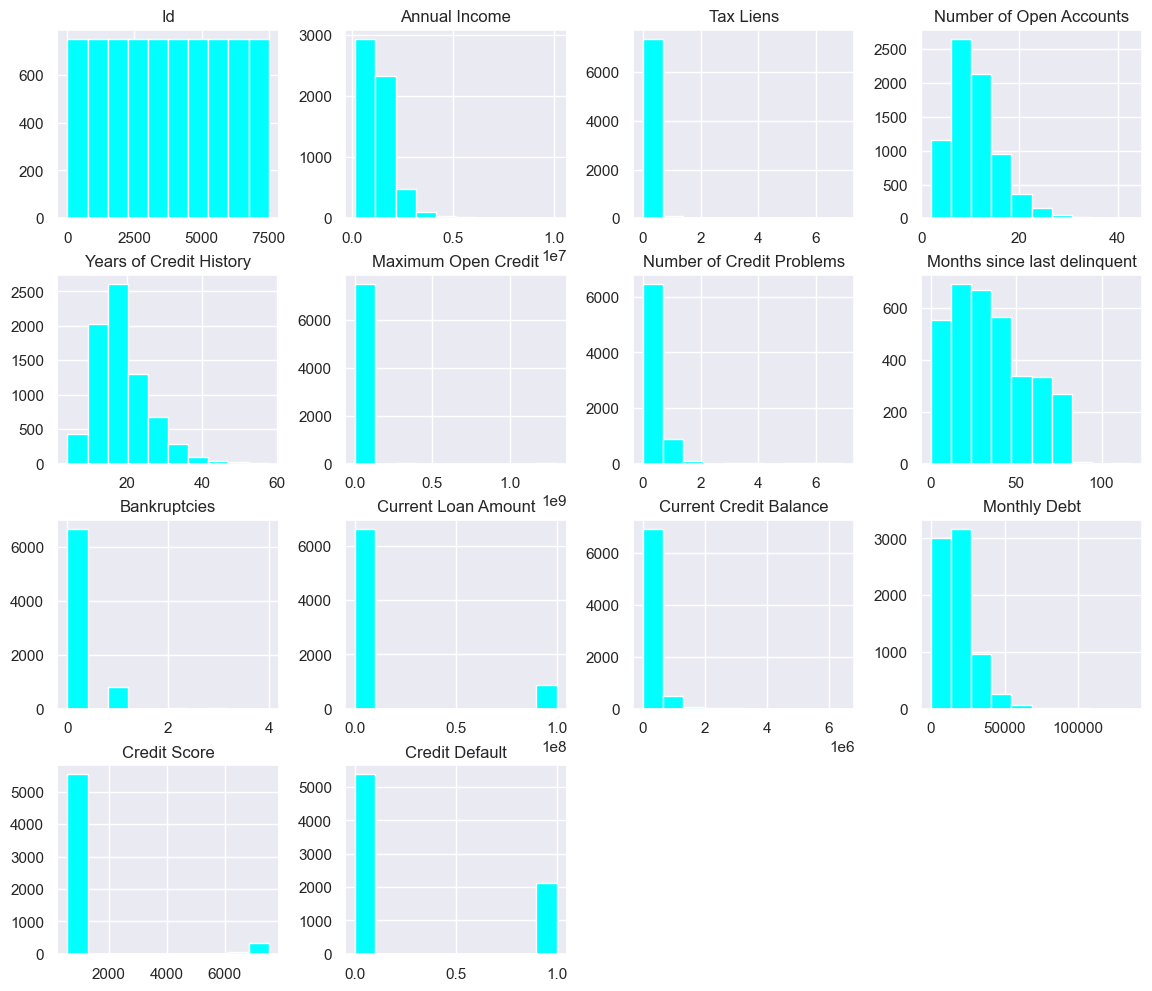

In [149]:
train.hist(figsize=(14, 12), color='aqua');

In [150]:
# Rename columns
new_cols = [str(i).lower().replace(" ", "_") for i in (list(train.columns))]
new_cols


[
    'id',
    'home_ownership',
    'annual_income',
    'years_in_current_job',
    'tax_liens',
    'number_of_open_accounts',
    'years_of_credit_history',
    'maximum_open_credit',
    'number_of_credit_problems',
    'months_since_last_delinquent',
    'bankruptcies',
    'purpose',
    'term',
    'current_loan_amount',
    'current_credit_balance',
    'monthly_debt',
    'credit_score',
    'credit_default'
]

In [151]:
train.columns = new_cols
test.columns = new_cols[:-1]

In [152]:
train.head(1)

,id,home_ownership,annual_income,years_in_current_job,tax_liens,number_of_open_accounts,years_of_credit_history,maximum_open_credit,number_of_credit_problems,months_since_last_delinquent,bankruptcies,purpose,term,current_loan_amount,current_credit_balance,monthly_debt,credit_score,credit_default
0,0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0


Brakujące wartości

In [153]:
missing_values = train.isnull().sum()

# Calculate percentage of missing values
percentage_missing = (missing_values / len(train)) * 100

# Create a new DataFrame to display results
result_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage Missing': percentage_missing
})

result_df.sort_values(by='Missing Values',ascending=False)

,Missing Values,Percentage Missing
months_since_last_delinquent,4081,54.413333
annual_income,1557,20.760000
credit_score,1557,20.760000
years_in_current_job,371,4.946667
bankruptcies,14,0.186667
monthly_debt,0,0.000000
current_credit_balance,0,0.000000
current_loan_amount,0,0.000000
term,0,0.000000
purpose,0,0.000000


In [154]:
# Features with missing values:
# months_since_last_delinquent
# annual_income
# credit_score
# years_in_current_job
# bankruptcies

In [155]:
train.years_in_current_job.value_counts(dropna = False)


years_in_current_job
10+ years    2332
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
NaN           371
8 years       339
9 years       259
Name: count, dtype: int64

In [156]:
years_in_current_job_map = {'10+ years': 10,'9 years': 9,'8 years': 8,'7 years':7,'6 years':6,
                            '5 years': 5, '4 years': 4, '3 years':3, '2 years': 2,'1 year': 1, '< 1 year':0 }

In [157]:
train.years_in_current_job=train.years_in_current_job.map(years_in_current_job_map)

In [158]:
train.years_in_current_job.value_counts(dropna = False)


years_in_current_job
10.0    2332
2.0      705
3.0      620
0.0      563
5.0      516
1.0      504
4.0      469
6.0      426
7.0      396
NaN      371
8.0      339
9.0      259
Name: count, dtype: int64

<Axes: >

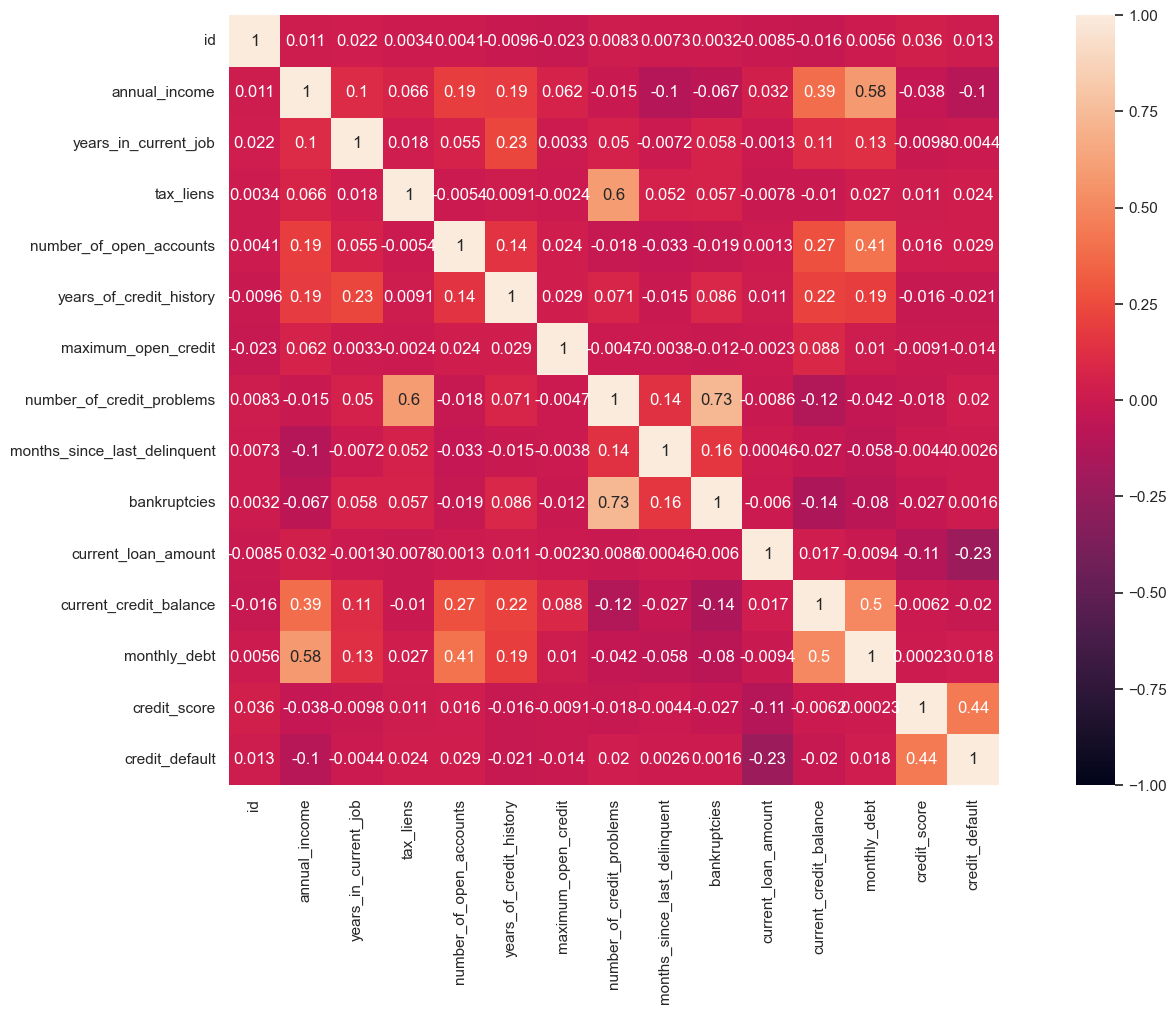

In [159]:
plt.figure(figsize = (20,10))
sns.heatmap(train.corr(numeric_only=True), annot = True, vmax = 1, vmin = -1, square = True)

In [160]:
print(train['bankruptcies'].value_counts(dropna = False))
print('*' * 80)
print(train['months_since_last_delinquent'].value_counts(dropna = False))
print('*' * 80)
print(train['credit_score'].value_counts(dropna = False))
print('*' * 80)
print(train['annual_income'].value_counts(dropna = False))

bankruptcies
0.0    6660
1.0     786
2.0      31
NaN      14
3.0       7
4.0       2
Name: count, dtype: int64
********************************************************************************
months_since_last_delinquent
NaN      4081
14.0       76
29.0       71
8.0        68
33.0       68
         ... 
86.0        1
118.0       1
84.0        1
91.0        1
92.0        1
Name: count, Length: 90, dtype: int64
********************************************************************************
credit_score
NaN       1557
740.0      169
747.0      168
748.0      157
745.0      152
          ... 
629.0        1
6820.0       1
6560.0       1
610.0        1
6060.0       1
Name: count, Length: 269, dtype: int64
********************************************************************************
annual_income
NaN          1557
969475.0        4
1043651.0       4
1161660.0       4
1058376.0       4
             ... 
1272316.0       1
712082.0        1
695476.0        1
678889.0        1
402192.0      

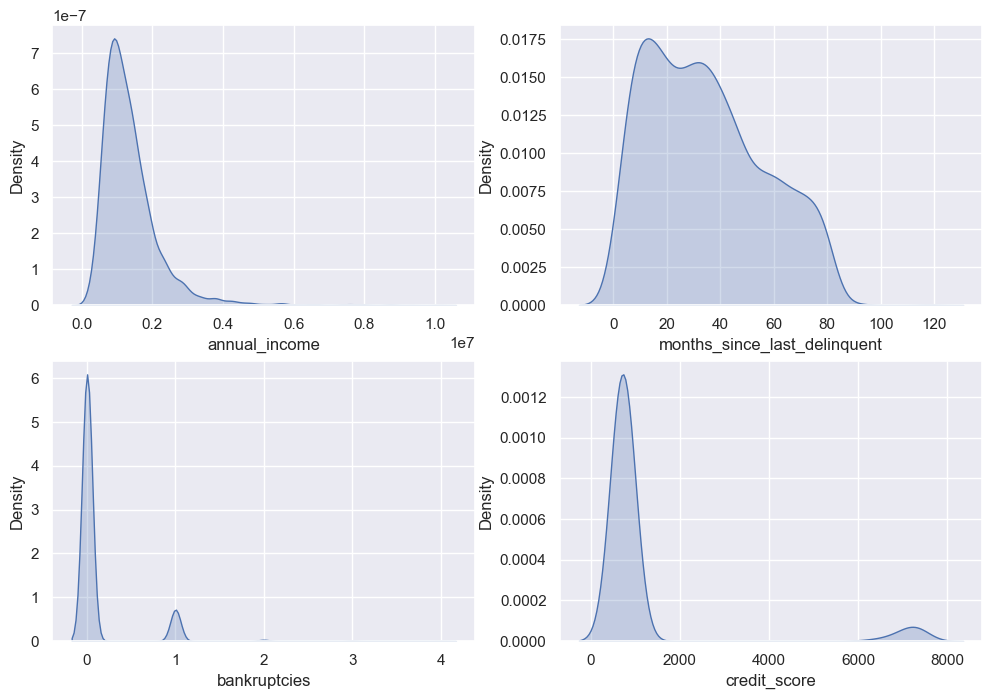

In [ ]:
# 13 - let's look at the distributions of features that have gaps and type float64/int
sns.set(rc={'figure.figsize': (12, 8)})

plt.subplot(2, 2, 1)
sns.kdeplot(data=train['annual_income'], fill=True)

plt.subplot(2, 2, 2)
sns.kdeplot(data=train['months_since_last_delinquent'], fill=True);

plt.subplot(2, 2, 3)
sns.kdeplot(data=train['bankruptcies'], fill=True);

plt.subplot(2, 2, 4)
sns.kdeplot(data=train['credit_score'], fill=True);

In [162]:
train['annual_income'].fillna(train['annual_income'].median(), inplace=True)
train['months_since_last_delinquent'].fillna(0, inplace=True)
train['bankruptcies'].fillna(train['bankruptcies'].median(), inplace=True)
train['credit_score'].fillna(train['credit_score'].median(), inplace=True)
train['years_in_current_job'].fillna(0, inplace=True)

In [163]:
train.isna().sum()


id                              0
home_ownership                  0
annual_income                   0
years_in_current_job            0
tax_liens                       0
number_of_open_accounts         0
years_of_credit_history         0
maximum_open_credit             0
number_of_credit_problems       0
months_since_last_delinquent    0
bankruptcies                    0
purpose                         0
term                            0
current_loan_amount             0
current_credit_balance          0
monthly_debt                    0
credit_score                    0
credit_default                  0
dtype: int64

Przygotowanie danych do modelowania

In [164]:
X = train.drop(['id', 'credit_default'], axis=1)
y = train['credit_default']

In [165]:
# Stworzenie dodatkowych kolumn 0/1 reprezentacją zmiennych kategorycznych
X = pd.get_dummies(X, drop_first=True)

In [166]:
X.columns.tolist()


[
    'annual_income',
    'years_in_current_job',
    'tax_liens',
    'number_of_open_accounts',
    'years_of_credit_history',
    'maximum_open_credit',
    'number_of_credit_problems',
    'months_since_last_delinquent',
    'bankruptcies',
    'current_loan_amount',
    'current_credit_balance',
    'monthly_debt',
    'credit_score',
    'home_ownership_Home Mortgage',
    'home_ownership_Own Home',
    'home_ownership_Rent',
    'purpose_buy a car',
    'purpose_buy house',
    'purpose_debt consolidation',
    'purpose_educational expenses',
    'purpose_home improvements',
    'purpose_major purchase',
    'purpose_medical bills',
    'purpose_moving',
    'purpose_other',
    'purpose_renewable energy',
    'purpose_small business',
    'purpose_take a trip',
    'purpose_vacation',
    'purpose_wedding',
    'term_Short Term'
]

Budowa modelu

In [202]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble  import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


In [180]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

Standaryzacja naszych zmiennych:

z = (x - u) / s

In [181]:
scaler=StandardScaler().fit(x_train)

In [182]:
x_train_std=scaler.transform(x_train)
x_test_std=scaler.transform(x_test)

Model regresji logsytcznej:

https://dax44.github.io/datamining/regresja-logistyczna.html

https://datascience.eu/computer-programming/understanding-logistic-regression-in-python/

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


In [183]:
clf_log_reg = LogisticRegression().fit(x_train_std, y_train)

Metryki

https://ksopyla.com/data-science/precision-recall-f1-miary-oceny-klasyfikatora/

<img src="https://miro.medium.com/v2/resize:fit:974/1*H_XIN0mknyo0Maw4pKdQhw.png" />

F1 score

$F_{1} = 2*\frac{PPV*TPR}    {PPV+TPR}=\frac{2TP}    {2TP+FP+FN}$

In [184]:
print(f'Train: ROC-AUC = {round(roc_auc_score(y_train, clf_log_reg.predict_proba(x_train_std)[:, 1]), 4)}\n')
print(f'Test: ROC-AUC = {round(roc_auc_score(y_test, clf_log_reg.predict_proba(x_test_std)[:,1]), 4)}\n')

print(classification_report(y_train, clf_log_reg.predict(x_train_std)))

Train: ROC-AUC = 0.7711

Test: ROC-AUC = 0.75

              precision    recall  f1-score   support

           0       0.77      0.97      0.86      3774
           1       0.81      0.27      0.40      1476

    accuracy                           0.78      5250
   macro avg       0.79      0.62      0.63      5250
weighted avg       0.78      0.78      0.73      5250



In [185]:
f1_score(y_test, clf_log_reg.predict(x_test_std))

0.3847980997624703

Optymalizacja hyperparametrów

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

In [204]:
logit_param_grid = {
    'C': [0.1, 1, 5, 10],
    'l1_ratio' : np.arange(0, 1, 0.2),
    'solver': ['newton-cg', 'liblinear', 'sag', 'saga'],
    'max_iter': [2000],
    'class_weight': [None, 'balanced'],
    'penalty': ['l1', 'l2', 'elasticnet'],
}

In [206]:
logit_grid_search = RandomizedSearchCV(clf_log_reg, logit_param_grid, cv=3, scoring='f1', n_iter=50, n_jobs=-1)
logit_grid_search.fit(x_train_std, y_train)

/Users/wojtek/Code/personal/env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/wojtek/Code/personal/env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/wojtek/Code/personal/env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/wojtek/Code/personal/env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/wojtek/Code/personal/env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'el

[12/04/23 23:49:16] WARNING  /Users/wojtek/Code/personal/env/lib/python3.9/site-packages/sklearn/mo ]8;id=13213;file:///Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=405941;file:///Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/warnings.py#109\109]8;;\
                             del_selection/_validation.py:425: FitFailedWarning:                                   
                             63 fits failed out of a total of 150.                                                 
                             The score on these train-test partitions for these parameters will be                 
                             set to nan.                                                                           
                             If these failures are not expected, you can try to debug them by                      
                             setting error_score='raise'.                                                          
                                                                                                                   
                             Below are more details about the failures:                                            
                             ----------------------------------------------------------------------                
                             ----------                                                                            
                             18 fits failed with the following error:                                              
                             Traceback (most recent call last):                                                    
                               File                                                                                
                             "/Users/wojtek/Code/personal/env/lib/python3.9/site-packages/sklearn/m                
                             odel_selection/_validation.py", line 729, in _fit_and_score                           
                                 estimator.fit(X_train, y_train, **fit_params)                                     
                               File                                                                                
                             "/Users/wojtek/Code/personal/env/lib/python3.9/site-packages/sklearn/b                
                             ase.py", line 1152, in wrapper                                                        
                                 return fit_method(estimator, *args, **kwargs)                                     
                               File                                                                                
                             "/Users/wojtek/Code/personal/env/lib/python3.9/site-packages/sklearn/l                
                             inear_model/_logistic.py", line 1169, in fit                                          
                                 solver = _check_solver(self.solver, self.penalty, self.dual)                      
                               File                                                                                
                             "/Users/wojtek/Code/personal/env/lib/python3.9/site-packages/sklearn/l                
                             inear_model/_logistic.py", line 56, in _check_solver                                  
                                 raise ValueError(                                                                 
                             ValueError: Solver sag supports only 'l2' or 'none' penalties, got                    
                             elasticnet penalty.                                                                   
                                                                                                                   
   

                    WARNING  /Users/wojtek/Code/personal/env/lib/python3.9/site-packages/sklearn/mo ]8;id=43532;file:///Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=199066;file:///Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/warnings.py#109\109]8;;\
                             del_selection/_search.py:979: UserWarning: One or more of the test                    
                             scores are non-finite: [0.53056701 0.53034083        nan 0.37767612                   
                             nan        nan                                                                        
                                     nan 0.40214384        nan 0.37870243        nan 0.5304525                     
                              0.52910876        nan 0.40312261        nan        nan 0.39981338                    
                              0.4013972  0.52910876        nan 0.40298985 0.40298985        nan                    
                              0.39967893 0.37870243        nan        nan 0.52784656 0.53138492                    
                              0.5304525  0.40053942 0.52931921 0.39981338        nan        nan                    
                              0.40053942        nan 0.40298985 0.52895971        nan 0.5315497                     
                              0.53000452 0.53084253 0.39967893        nan        nan        nan                    
                                     nan 0.52827946]                                                               
                               warnings.warn(                                                                      
                                                                                                                   

                    WARNING  /Users/wojtek/Code/personal/env/lib/python3.9/site-packages/sklearn/li ]8;id=741194;file:///Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=44327;file:///Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/warnings.py#109\109]8;;\
                             near_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only                 
                             used when penalty is 'elasticnet'. Got (penalty=l1)                                   
                               warnings.warn(                                                                      
                                                                                                                   

Logit fitted successfully!


In [207]:
refined_logit = logit_grid_search.best_estimator_

In [208]:
refined_logit.fit(x_train_std, y_train)


[12/04/23 23:49:50] WARNING  /Users/wojtek/Code/personal/env/lib/python3.9/site-packages/sklearn/li ]8;id=964453;file:///Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=178212;file:///Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/warnings.py#109\109]8;;\
                             near_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only                 
                             used when penalty is 'elasticnet'. Got (penalty=l1)                                   
                               warnings.warn(                                                                      
                                                                                                                   

LogisticRegression(C=0.1, class_weight='balanced', l1_ratio=0.2, max_iter=2000,
                   penalty='l1', solver='liblinear')

In [209]:
f1_score(y_test, refined_logit.predict(x_test_std))

0.5145565335138795

In [211]:
print(f'Train: ROC-AUC = {round(roc_auc_score(y_train, refined_logit.predict_proba(x_train_std)[:, 1]), 4)}\n')
print(f'Test: ROC-AUC = {round(roc_auc_score(y_test, refined_logit.predict_proba(x_test_std)[:,1]), 4)}\n')

print(classification_report(y_train, refined_logit.predict(x_train_std)))

Train: ROC-AUC = 0.7689

Test: ROC-AUC = 0.746

              precision    recall  f1-score   support

           0       0.84      0.71      0.77      3774
           1       0.47      0.65      0.54      1476

    accuracy                           0.70      5250
   macro avg       0.65      0.68      0.66      5250
weighted avg       0.73      0.70      0.71      5250

